In [1]:
from scipy.stats import norm
from scipy.optimize import fsolve

What percentage of bottles contain less than one liter?

In [12]:
norm.cdf(1,loc=1,scale=0.02)

2.866515719235352e-07

In [3]:
def mean_needed(x):
    return norm.cdf(1,loc=x,scale=0.02)-0.05

In [19]:
best=fsolve(mean_needed,1)[0]

In [20]:
norm.cdf(1,loc=best,scale=0.02)

0.05000000000001171

In [22]:
from scipy.stats import binom

1- binom.pmf(k=0,n=10,p=0.05)

0.4012630607616211

Fine is 10000€, and is there a way to pay less?

In [24]:
(1- binom.pmf(k=0,n=10,p=0.05))*10000

4012.630607616211

In [25]:
(1- binom.pmf(k=0,n=10,p=0.04))*10000 + 1000

4351.6736400849895

In [26]:
(1- binom.pmf(k=0,n=10,p=0.03))*10000 + 2000

4625.758731050717

In [27]:
(1- binom.pmf(k=0,n=10,p=0.0))*10000 + 5000

5000.0

In [28]:
from scipy import stats as st

In [36]:
st.bernoulli.rvs(size=20,p=0.5)

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [43]:
st.expon.rvs(loc=5,scale=9)

8.084692283048652

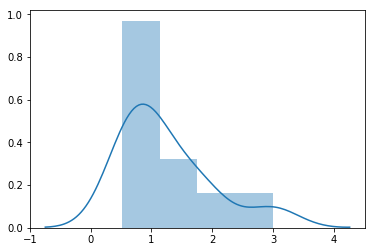

In [44]:
import seaborn as sns
sns.distplot(st.lognorm.rvs(0.5,size=10))

In [48]:
X=st.norm(loc=0.5,scale=1)

In [49]:
X.pdf(2)

0.12951759566589174

In [51]:
X.pdf(1)

0.3520653267642995

In [53]:
y=X.rvs(size=10000)

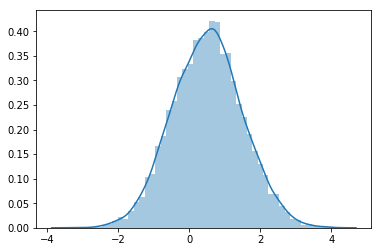

In [55]:
sns.distplot(y)

In [56]:
X.pdf(4)

0.0008726826950457602

In [57]:
X.cdf(0)

0.3085375387259869

# Lab solutions

In [58]:
total=100
apples=60
oranges=40

In [59]:
p_a=apples/total
p_o=oranges/total

In [61]:
p_a,p_o

(0.6, 0.4)

In [62]:
p_a**5

0.07775999999999998

In [63]:
p_a**5*p_o**15

8.349416423424006e-08

In [64]:
from scipy.stats import binom

In [65]:
binom.pmf(k=5,n=20,p=p_a)

0.0012944935222876511

In [66]:
binom.pmf(k=15,n=20,p=p_o)

0.0012944935222876511

In [67]:
sum(binom.pmf(k=i,n=20,p=p_a) for i in range(6))

0.0016115246434562803

In [68]:
binom.cdf(k=5,n=20,p=p_a)

0.001611524643456288

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

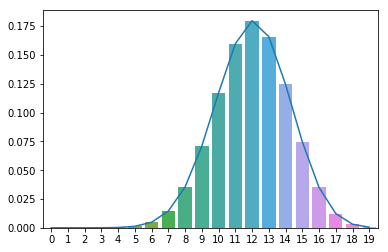

In [73]:
x=np.arange(0,20)

plt.plot(x, binom.pmf(x,20,p_a))
sns.barplot(x, binom.pmf(x,20,p_a))

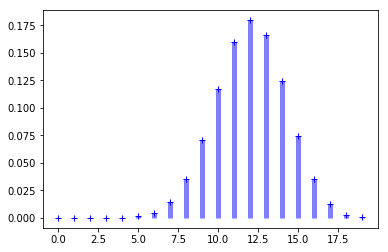

In [81]:
fig,ax=plt.subplots(1,1)

ax.plot(x, binom.pmf(x,20,p_a),'b+')
ax.vlines(x,0,binom.pmf(x,20,p_a),colors='b',lw=5,alpha=0.5)

In [82]:
import math

In [90]:
def my_poisson(i, lamda):
    if isinstance(i,list):
        return [(lamda**j)/math.factorial(j)*math.exp(-lamda) for j in i]
    else:
        return (lamda**i)/math.factorial(i)*math.exp(-lamda)

In [91]:
my_poisson(5,2.3)

0.05377502558194681

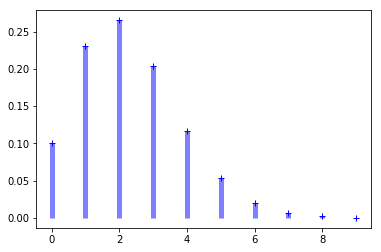

In [95]:
x=list(range(0,10))
fig,ax=plt.subplots(1,1)

ax.plot(x, my_poisson(x,2.3),'b+')
ax.vlines(x,0,my_poisson(x,2.3),colors='b',lw=5,alpha=0.5)

In [96]:
from scipy.stats import poisson

In [100]:
poisson.pmf(k=5,mu=2.3)

0.053775025581946814

In [101]:
poisson(2.3).pmf(5)

0.053775025581946814

In [102]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.53997676 2.22095337 2.35685888 2.37248554 2.73022787 2.13539955
 2.97444326 2.50503799 2.79695319 2.96547138]


In [103]:
def uni(bottom, ceiling, count):
    x=uniform.rvs(size=count)
    randoms= bottom+(ceiling-bottom)*x
    return randoms

In [104]:
uni(1,5,10)

array([3.64813971, 3.0471146 , 4.24605135, 3.96597174, 2.75572376,
       4.37657202, 4.49786401, 4.01227942, 4.16537755, 2.22761887])

In [105]:
aaa=uni(bottom=10, ceiling=15, count=100)
bbb=uni(bottom=10, ceiling=60, count=1000)

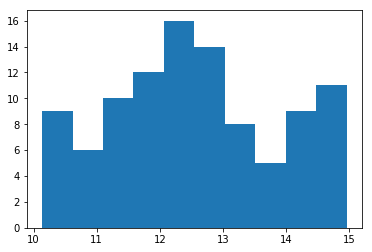

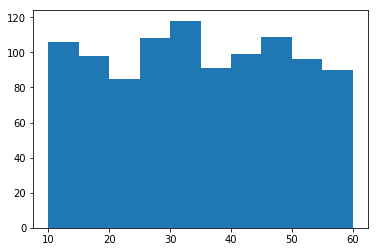

In [109]:
plt.hist(aaa)
plt.show()
plt.hist(bbb)
plt.show()

In [110]:
from scipy.stats import norm

In [111]:
def my_norm(mu,sigma,count):
    return norm.rvs(mu,sigma,count)

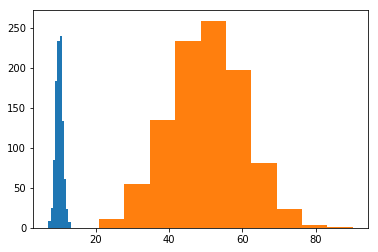

In [115]:
plt.hist(my_norm(10,1,1000))
plt.hist(my_norm(50,10,1000))
plt.show()

In [116]:
import pandas as pd

In [118]:
df=pd.read_csv(r'C:\Users\eldii\Documents\GitHub\0323_2020DATAPAR\Labs\module_2\Regression-Analysis/vehicles.csv')

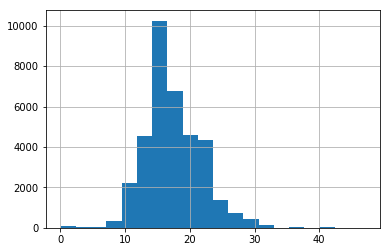

In [128]:
df['Fuel Barrels/Year'].hist(bins=20)

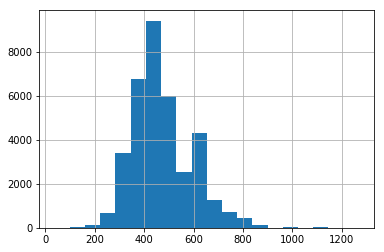

In [129]:
df['CO2 Emission Grams/Mile'].hist(bins=20)

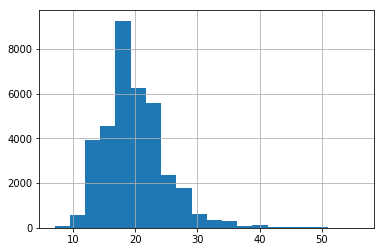

In [130]:
df['Combined MPG'].hist(bins=20)

In [131]:
from scipy.stats import expon

In [140]:
def my_exp(size):
    mean=10
    dec=1/mean
    return expon.rvs(dec,size=size)

In [143]:
aaa=my_exp(1)
bbb=my_exp(100)

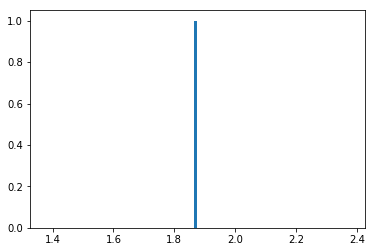

In [146]:
plt.hist(aaa,bins=100);

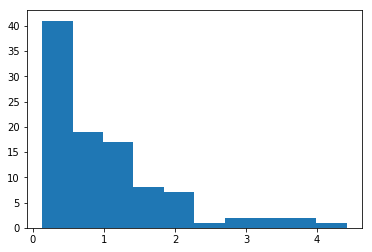

In [148]:
plt.hist(bbb,bins=10);

In [156]:
expon.cdf(x=15,scale=10)

0.7768698398515702

# Advanced Pandas

In [158]:
df1=pd.DataFrame(np.random.random((10,4)),columns=list('abcd'))

In [159]:
df1

,a,b,c,d
0,0.727072,0.876054,0.276810,0.157806
1,0.116374,0.311923,0.856227,0.725038
2,0.897591,0.504996,0.142539,0.563245
3,0.284735,0.729458,0.557585,0.779343
4,0.906252,0.052976,0.230009,0.035779
5,0.472840,0.875660,0.221801,0.626824
6,0.745310,0.051203,0.883670,0.299786
7,0.342784,0.783969,0.120069,0.504560
8,0.447898,0.692344,0.015463,0.046764
9,0.479363,0.075225,0.053017,0.797894


In [161]:
df1.where(df1.b>0.5,0)

,a,b,c,d
0,0.727072,0.876054,0.276810,0.157806
1,0.000000,0.000000,0.000000,0.000000
2,0.897591,0.504996,0.142539,0.563245
3,0.284735,0.729458,0.557585,0.779343
4,0.000000,0.000000,0.000000,0.000000
5,0.472840,0.875660,0.221801,0.626824
6,0.000000,0.000000,0.000000,0.000000
7,0.342784,0.783969,0.120069,0.504560
8,0.447898,0.692344,0.015463,0.046764
9,0.000000,0.000000,0.000000,0.000000


In [162]:
df2=pd.DataFrame(np.random.random((10,4)),columns=list('abcd'))

In [167]:
np.where(df1<df2, 1,0)

array([[0, 0, 1, 1],
       [1, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 1, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 1, 1, 0]])

In [168]:
eval('2+2')

4

In [173]:
df1.eval('b>0.5 & c<0.1')

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
dtype: bool

In [178]:
(df1.b>0.5) & (df1.c<0.1)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
dtype: bool

In [180]:
df1.query('b>0.5')

,a,b,c,d
0,0.727072,0.876054,0.276810,0.157806
2,0.897591,0.504996,0.142539,0.563245
3,0.284735,0.729458,0.557585,0.779343
5,0.472840,0.875660,0.221801,0.626824
7,0.342784,0.783969,0.120069,0.504560
8,0.447898,0.692344,0.015463,0.046764


In [191]:
df1.columns=['a','b1','c ','d.11']

In [192]:
df1

,a,b1,c,d.11
0,0.727072,0.876054,0.276810,0.157806
1,0.116374,0.311923,0.856227,0.725038
2,0.897591,0.504996,0.142539,0.563245
3,0.284735,0.729458,0.557585,0.779343
4,0.906252,0.052976,0.230009,0.035779
5,0.472840,0.875660,0.221801,0.626824
6,0.745310,0.051203,0.883670,0.299786
7,0.342784,0.783969,0.120069,0.504560
8,0.447898,0.692344,0.015463,0.046764
9,0.479363,0.075225,0.053017,0.797894


In [187]:
df1.eval(r'"c ">0')

TypeError: data type "c " not understood

In [190]:
df1.query('a>0.2')

,a,b,c,d.11
0,0.727072,0.876054,0.276810,0.157806
2,0.897591,0.504996,0.142539,0.563245
3,0.284735,0.729458,0.557585,0.779343
4,0.906252,0.052976,0.230009,0.035779
5,0.472840,0.875660,0.221801,0.626824
6,0.745310,0.051203,0.883670,0.299786
7,0.342784,0.783969,0.120069,0.504560
8,0.447898,0.692344,0.015463,0.046764
9,0.479363,0.075225,0.053017,0.797894


In [193]:
df1.query('b1>0.7')

,a,b1,c,d.11
0,0.727072,0.876054,0.276810,0.157806
3,0.284735,0.729458,0.557585,0.779343
5,0.472840,0.875660,0.221801,0.626824
7,0.342784,0.783969,0.120069,0.504560


In [195]:
seasons=pd.DataFrame(np.random.randn(10,4), columns=['hiver','printemps','ete','automne'])

In [202]:
seasons=((seasons+5)*3).round()

In [204]:
seasons.query('hiver>14')

,hiver,printemps,ete,automne
1,16.0,20.0,6.0,12.0
4,15.0,18.0,7.0,17.0
6,17.0,15.0,21.0,13.0
7,15.0,15.0,15.0,15.0
8,15.0,15.0,13.0,10.0


In [205]:
seasons.get(seasons.hiver>14)

,hiver,printemps,ete,automne
1,16.0,20.0,6.0,12.0
4,15.0,18.0,7.0,17.0
6,17.0,15.0,21.0,13.0
7,15.0,15.0,15.0,15.0
8,15.0,15.0,13.0,10.0


In [207]:
lookup=np.random.choice(seasons.columns, 10)

In [208]:
lookup

array(['automne', 'printemps', 'ete', 'automne', 'automne', 'ete',
       'automne', 'printemps', 'automne', 'hiver'], dtype=object)

In [209]:
seasons.lookup(df1.index, lookup)

array([16., 20., 15., 15., 17., 14., 13., 15., 10., 14.])

In [210]:
seasons

,hiver,printemps,ete,automne
0,12.0,17.0,17.0,16.0
1,16.0,20.0,6.0,12.0
2,13.0,16.0,15.0,16.0
3,14.0,17.0,17.0,15.0
4,15.0,18.0,7.0,17.0
5,12.0,13.0,14.0,14.0
6,17.0,15.0,21.0,13.0
7,15.0,15.0,15.0,15.0
8,15.0,15.0,13.0,10.0
9,14.0,16.0,15.0,8.0


In [212]:
seasons.lookup(seasons.index, ['printemps']*10)

array([17., 20., 16., 17., 18., 13., 15., 15., 15., 16.])

In [213]:
seasons.printemps

0    17.0
1    20.0
2    16.0
3    17.0
4    18.0
5    13.0
6    15.0
7    15.0
8    15.0
9    16.0
Name: printemps, dtype: float64

In [214]:
ks=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/ks-projects-201801.csv.zip')

In [215]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [220]:
ks.usd_pledged_real/ks.backers

0                NaN
1         161.400000
2          73.333333
3           1.000000
4          91.642857
             ...    
378656     25.000000
378657     31.000000
378658     20.000000
378659     33.333333
378660     30.823529
Length: 378661, dtype: float64

In [219]:
pd.to_datetime(ks.deadline)-pd.to_datetime(ks.launched)

0        58 days 11:47:32
1        59 days 19:16:03
2        44 days 23:39:10
3        29 days 20:35:49
4        55 days 15:24:57
               ...       
378656   29 days 21:24:30
378657   26 days 20:24:46
378658   45 days 04:19:30
378659   30 days 05:46:07
378660   27 days 14:52:13
Length: 378661, dtype: timedelta64[ns]

In [218]:
pd.to_datetime(ks.launched)

0        2015-08-11 12:12:28
1        2017-09-02 04:43:57
2        2013-01-12 00:20:50
3        2012-03-17 03:24:11
4        2015-07-04 08:35:03
                 ...        
378656   2014-09-17 02:35:30
378657   2011-06-22 03:35:14
378658   2010-07-01 19:40:30
378659   2016-01-13 18:13:53
378660   2011-07-19 09:07:47
Name: launched, Length: 378661, dtype: datetime64[ns]

In [221]:
ks.assign(dollar_per_backer=ks.usd_pledged_real/ks.backers,
         duration=pd.to_datetime(ks.deadline)-pd.to_datetime(ks.launched))

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,dollar_per_backer,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,NaN,58 days 11:47:32
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,161.400000,59 days 19:16:03
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,73.333333,44 days 23:39:10
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,1.000000,29 days 20:35:49
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,91.642857,55 days 15:24:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,25.000000,29 days 21:24:30
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,31.000000,26 days 20:24:46
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,20.000000,45 days 04:19:30
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,33.333333,30 days 05:46:07
